In [9]:
#importing the dependencies
import tensorflow as tf 
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np 
from six import BytesIO
from PIL import Image

In [24]:
#converting to image to demanded input format/shape
path="pic_invasion.jpg"
image_data=tf.io.gfile.GFile(path,'rb').read()
image=Image.open(BytesIO(image_data))
(im_width,im_height)=image.size
image_np=np.array(image.getdata()).reshape(
    (1,im_height,im_width,3)).astype(np.uint8)
print(image_np)



[[[[ 40  40  42]
   [ 30  30  32]
   [ 28  28  30]
   ...
   [101  91  79]
   [ 98  88  76]
   [ 85  75  63]]

  [[ 27  27  29]
   [ 17  17  19]
   [ 15  15  17]
   ...
   [115 105  93]
   [112 102  90]
   [ 98  88  76]]

  [[ 24  24  26]
   [ 14  14  16]
   [ 12  12  14]
   ...
   [118 108  96]
   [115 105  93]
   [101  91  79]]

  ...

  [[ 25  24  30]
   [ 17  16  22]
   [ 17  16  22]
   ...
   [ 93  94  98]
   [ 91  92  96]
   [ 79  80  84]]

  [[ 25  24  30]
   [ 17  16  22]
   [ 18  17  23]
   ...
   [ 89  90  94]
   [ 86  87  91]
   [ 75  76  80]]

  [[ 29  28  34]
   [ 21  20  26]
   [ 22  21  27]
   ...
   [ 86  87  91]
   [ 83  84  88]
   [ 72  73  77]]]]


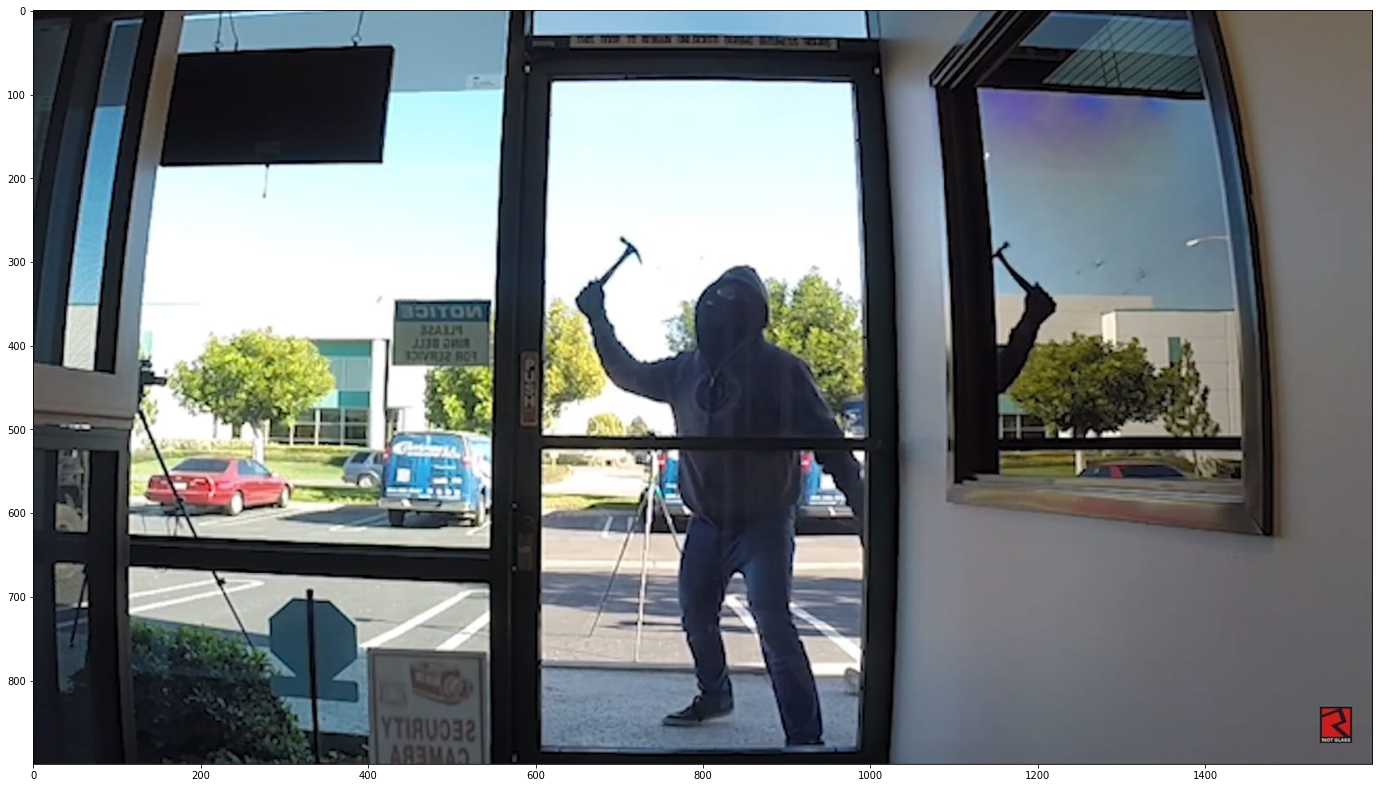

In [25]:
#display to loaded image
plt.figure(figsize=(24,32))
plt.imshow(image_np[0])
plt.show()

In [40]:
#load the pre-trained maskrcnn model from tensorflow hub
maskrcnn_link= 'https://tfhub.dev/tensorflow/mask_rcnn/inception_resnet_v2_1024x1024/1'
model=hub.load(maskrcnn_link)


In [26]:
#run the pre-trained model on the picture i just loaded
results=model(image_np)

In [27]:
result = {key:value.numpy() for key,value in results.items()}
print(result.keys())

dict_keys(['raw_detection_scores', 'proposal_boxes_normalized', 'detection_multiclass_scores', 'num_proposals', 'anchors', 'detection_boxes', 'image_shape', 'rpn_objectness_predictions_with_background', 'detection_scores', 'detection_masks', 'rpn_features_to_crop', 'detection_anchor_indices', 'refined_box_encodings', 'mask_predictions', 'final_anchors', 'detection_classes', 'rpn_box_predictor_features', 'num_detections', 'class_predictions_with_background', 'raw_detection_boxes', 'proposal_boxes', 'rpn_box_encodings', 'box_classifier_features'])


In [17]:
!git clone --depth 1 https://github.com/tensorflow/models #clonde the tensorflow repo to use their visualization API

Cloning into 'models'...
remote: Enumerating objects: 2283, done.
remote: Counting objects: 100% (2283/2283), done.
remote: Compressing objects: 100% (1976/1976), done.
remote: Total 2283 (delta 559), reused 945 (delta 281), pack-reused 0
Receiving objects: 100% (2283/2283), 30.56 MiB | 14.90 MiB/s, done.
Resolving deltas: 100% (559/559), done.


In [18]:
 #install the tf API --THIS PART OF THE CODE WAS COPIED FROM TF DOCUMENTATION--
%%bash
sudo apt install -y protobuf-compiler
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Reading package lists...
Building dependency tree...
Reading state information...
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-cp36-none-any.whl size=1597507 sha256=baa4daa479a3f37ccbd833d05854b753d5e4df7b559b65bb05d425be1272f656
  Stored in directory: /tmp/pip-ephem-wheel-cache-t3aid53z/wheels/94/49/4b/39b051683087a22ef7e80ec52152a27249d1a644ccf4e442ea
  Created wheel for avro-python3: filename=avro_python3-1.10.0-cp36-none-any.whl size=43735 sha256=3578b065e5261d2e0e943afbf3a31887c0b483ed4becf3fba56eb68302c68e58
  Stored in directory: /root/.cache/pip/wheels/3f/15/cd/fe4ec8b88c130393464703ee8111e2cddebdc40e1b59ea85e9
  Created wheel for future: filename=future-0.18.2-cp36-none-any.whl size=491057 sha256=032fab26d9dec12627d63d430e261704c2e31e0145b0c42189e6dbfee1fbe5e7
  Stored in directory: /root/



ERROR: multiprocess 0.70.10 has requirement dill>=0.3.2, but you'll have dill 0.3.1.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.24.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: apache-beam 2.25.0 has requirement avro-python3!=1.9.2,<1.10.0,>=1.8.1; python_version >= "3.0", but you'll have avro-python3 1.10.0 which is incompatible.


In [19]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import ops as utils_ops

%matplotlib inline

In [21]:
PATH_TO_LABELS = './models/research/object_detection/data/mscoco_label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

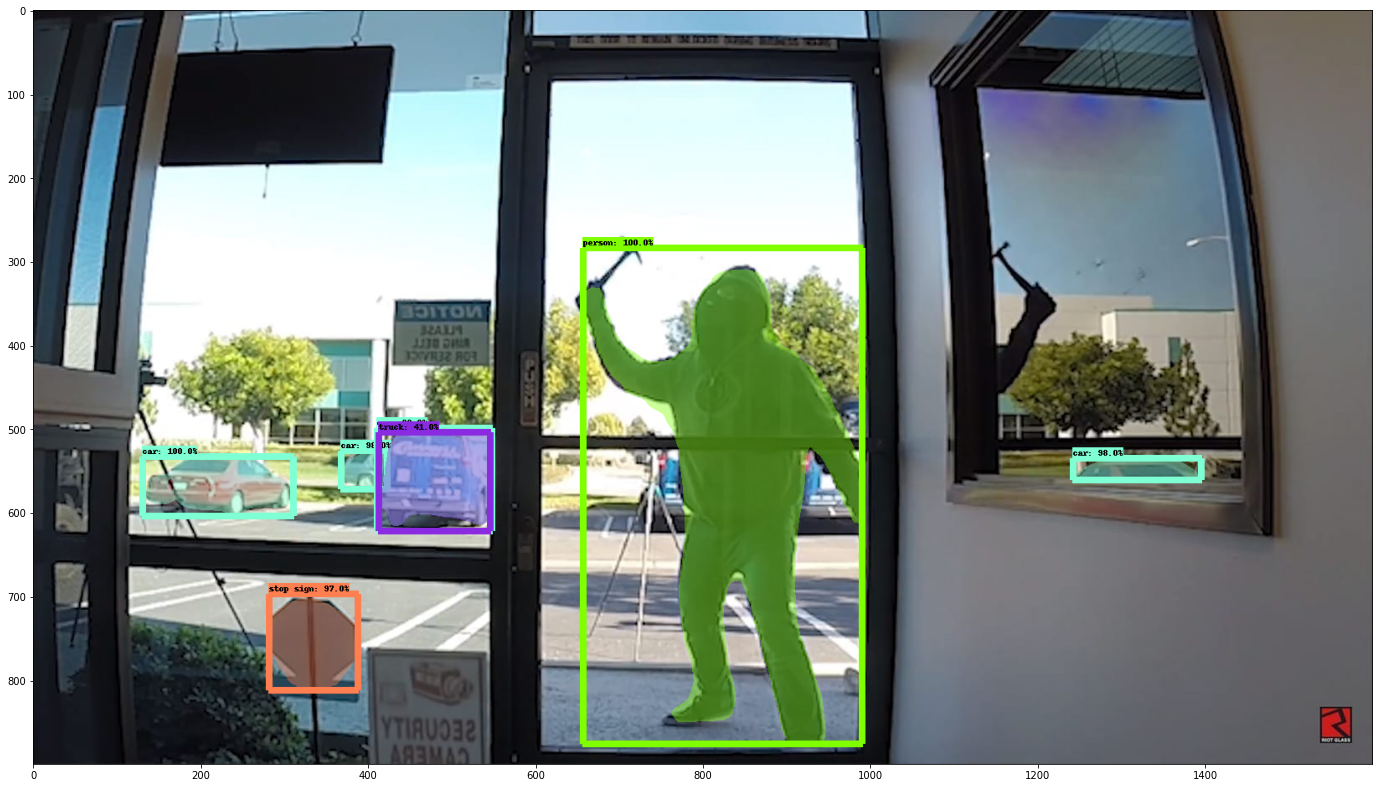

In [28]:
#visualizing the results with the tf API --THIS PART OF THE CODE WAS COPIED FROM THE DOCUMENTATION--
label_id_offset = 0
# Handle models with masks:
image_np_with_mask = image_np.copy()

if 'detection_masks' in result:
  # we need to convert np.arrays to tensors
  detection_masks = tf.convert_to_tensor(result['detection_masks'][0])
  detection_boxes = tf.convert_to_tensor(result['detection_boxes'][0])

  # Reframe the the bbox mask to the image size.
  detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes,
              image_np.shape[1], image_np.shape[2])
  detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                      tf.uint8)
  result['detection_masks_reframed'] = detection_masks_reframed.numpy()

viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_mask[0],
      result['detection_boxes'][0],
      (result['detection_classes'][0] + label_id_offset).astype(int),
      result['detection_scores'][0],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=.30,
      agnostic_mode=False,
      instance_masks=result.get('detection_masks_reframed', None),
      line_thickness=8)

plt.figure(figsize=(24,32))
plt.imshow(image_np_with_mask[0])
plt.show()

####**Observations: we can see here that the model failed to detect and identify the robber's weapon!**

## **In the rest of the notebook we'll be testing the model on different burglary scenarios**
* during the day
* at night
* armed
* bad quality 



In [39]:
def image_to_array(path):
  image_data=tf.io.gfile.GFile(path,'rb').read()
  image=Image.open(BytesIO(image_data))
  (im_width,im_height)=image.size
  image_np=np.array(image.getdata()).reshape(
    (1,im_height,im_width,3)).astype(np.uint8)
  return image_np

def display_results(image):
  results=model(image_np)
  result={key:value.numpy() for key,value in results.items()}
  label_id_offset = 0
# Handle models with masks:
  image_np_with_mask = image_np.copy()

  if 'detection_masks' in result:
  # we need to convert np.arrays to tensors
    detection_masks = tf.convert_to_tensor(result['detection_masks'][0])
    detection_boxes = tf.convert_to_tensor(result['detection_boxes'][0])

  # Reframe the the bbox mask to the image size.
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes,
              image_np.shape[1], image_np.shape[2])
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                      tf.uint8)
    result['detection_masks_reframed'] = detection_masks_reframed.numpy()

  viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_mask[0],
      result['detection_boxes'][0],
      (result['detection_classes'][0] + label_id_offset).astype(int),
      result['detection_scores'][0],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=.30,
      agnostic_mode=False,
      instance_masks=result.get('detection_masks_reframed', None),
      line_thickness=8)

  plt.figure(figsize=(24,32))
  plt.imshow(image_np_with_mask[0])
  plt.show()

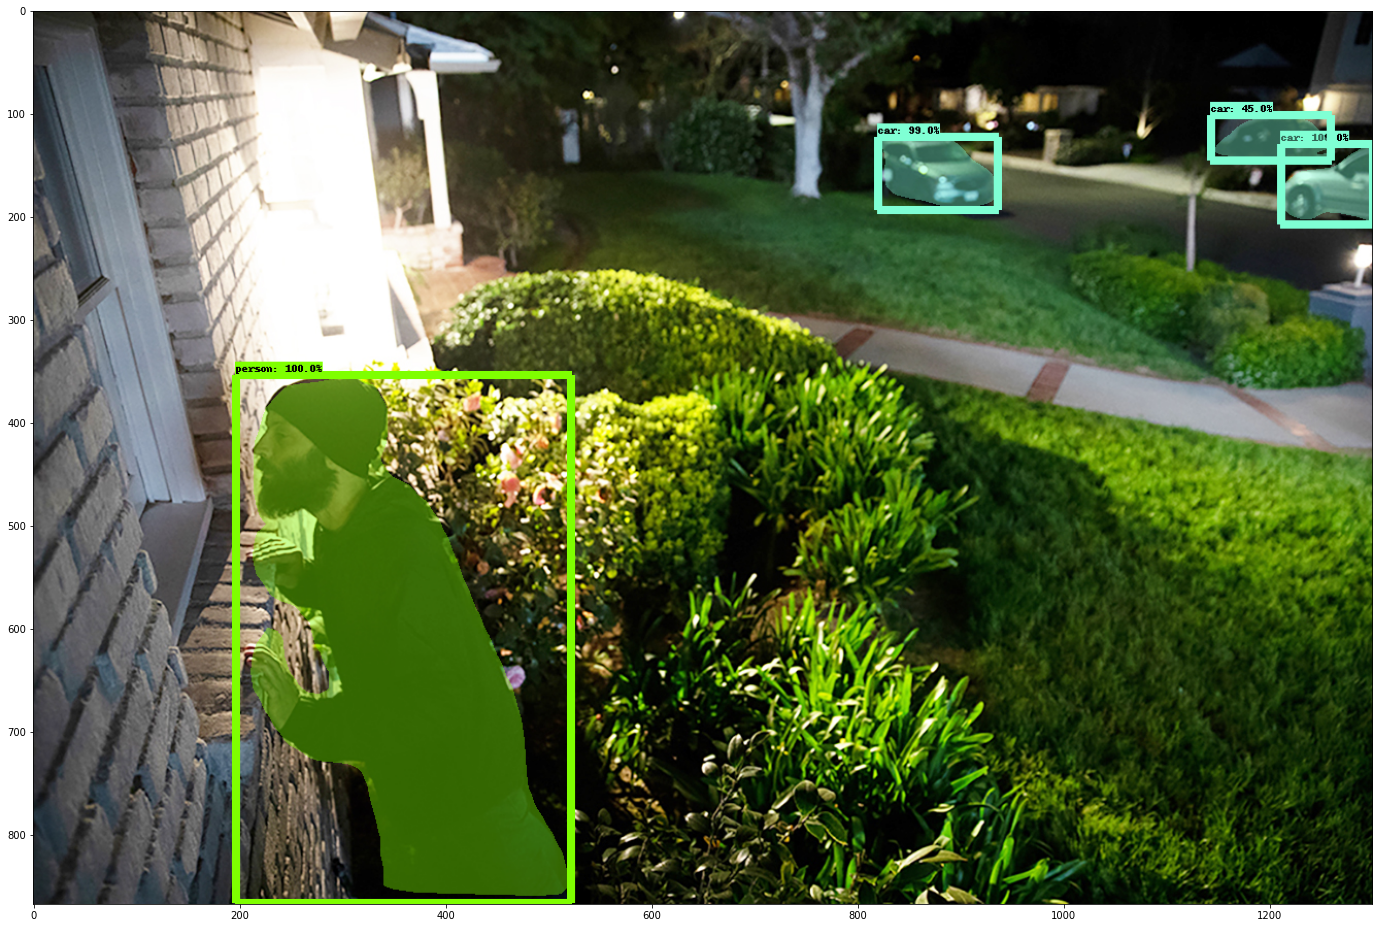

In [45]:
image_np=image_to_array('3.jpg')
display_results(image_np)

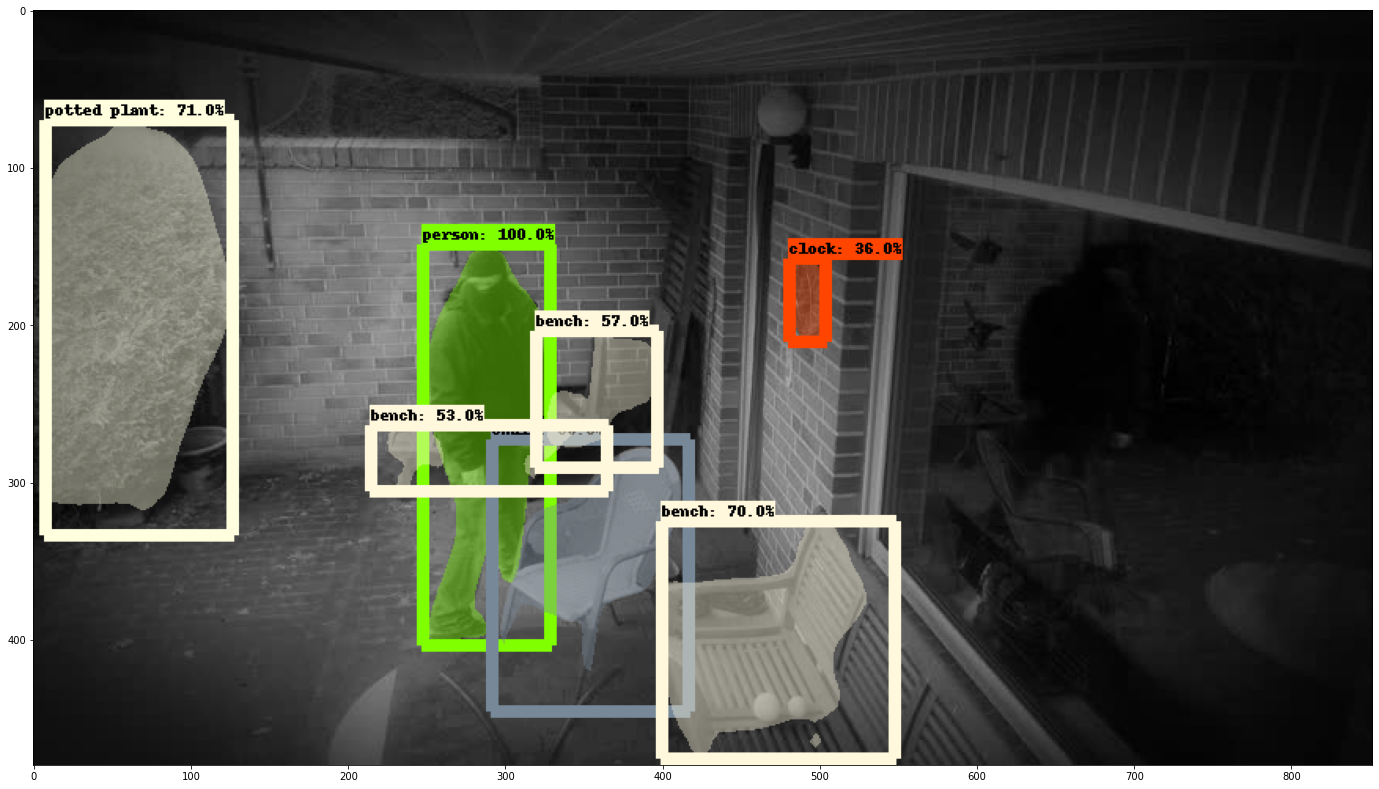

In [34]:
image_np=image_to_array('7.jpg')
display_results(image_np)

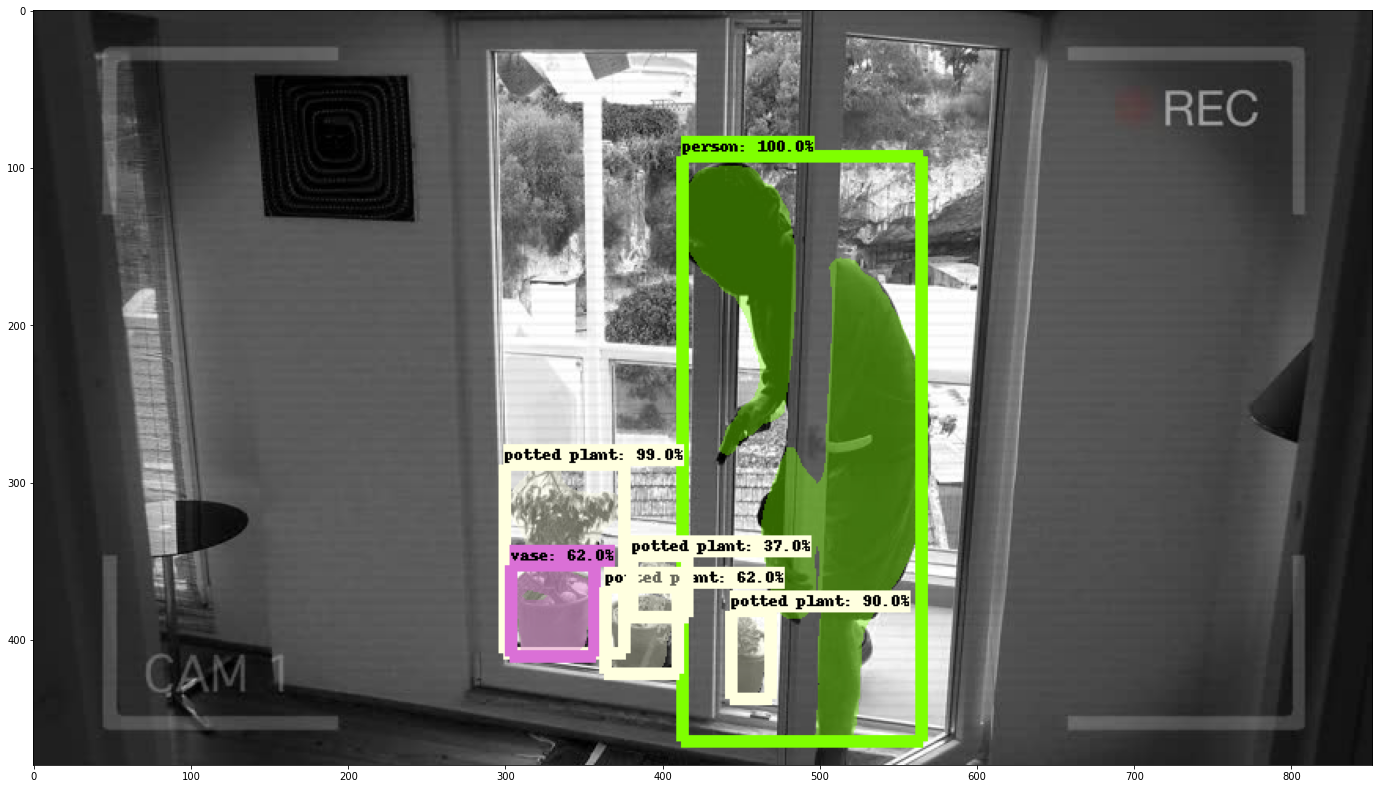

In [36]:
image_np=image_to_array('8.jpg')
display_results(image_np)

### **Observation: the model once again doesnt detect and identify weapons**

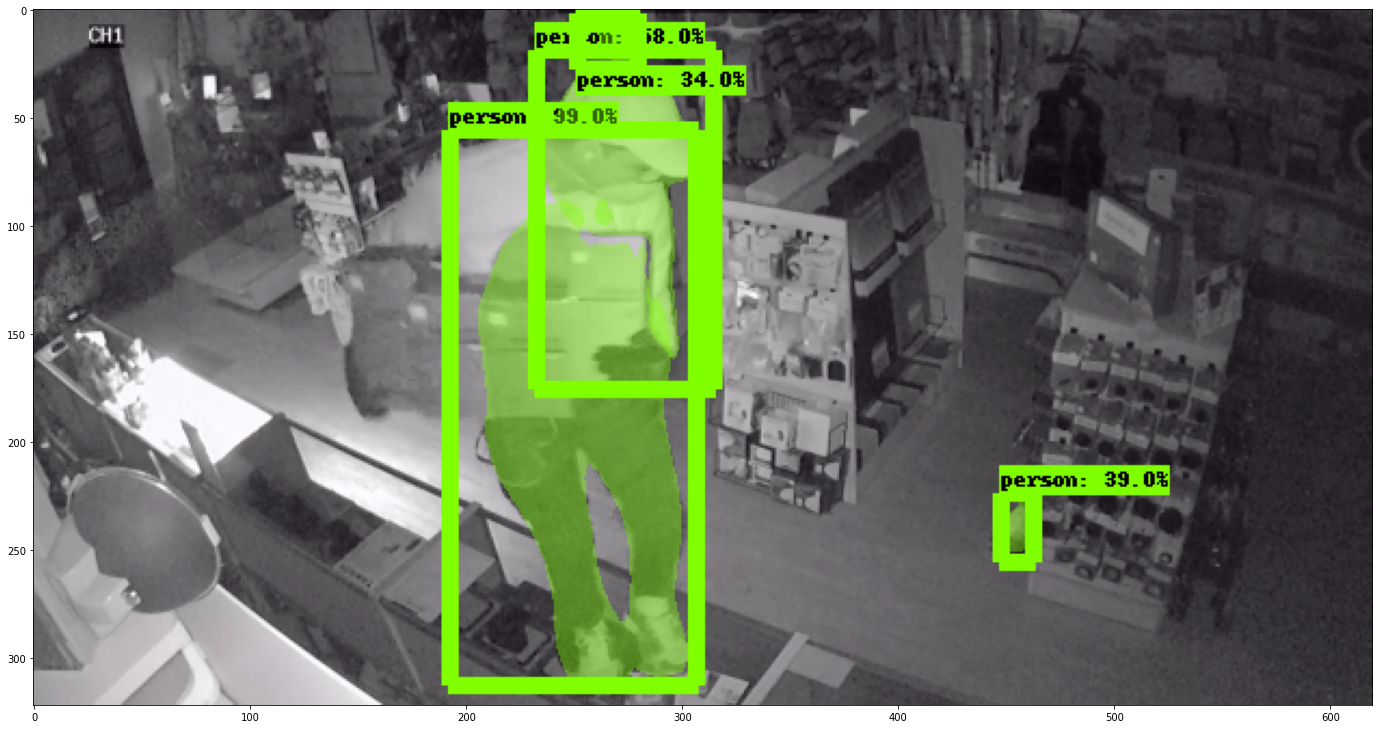

In [37]:
image_np=image_to_array('9.jpg')
display_results(image_np)

### **Observation: on this low quality fish eye type of camera we can see the model struggling to properly detect the robber. It detected the man with a confidence of 99% then labeled some noise in the image as *person* with low confidence between 34% and 58%**

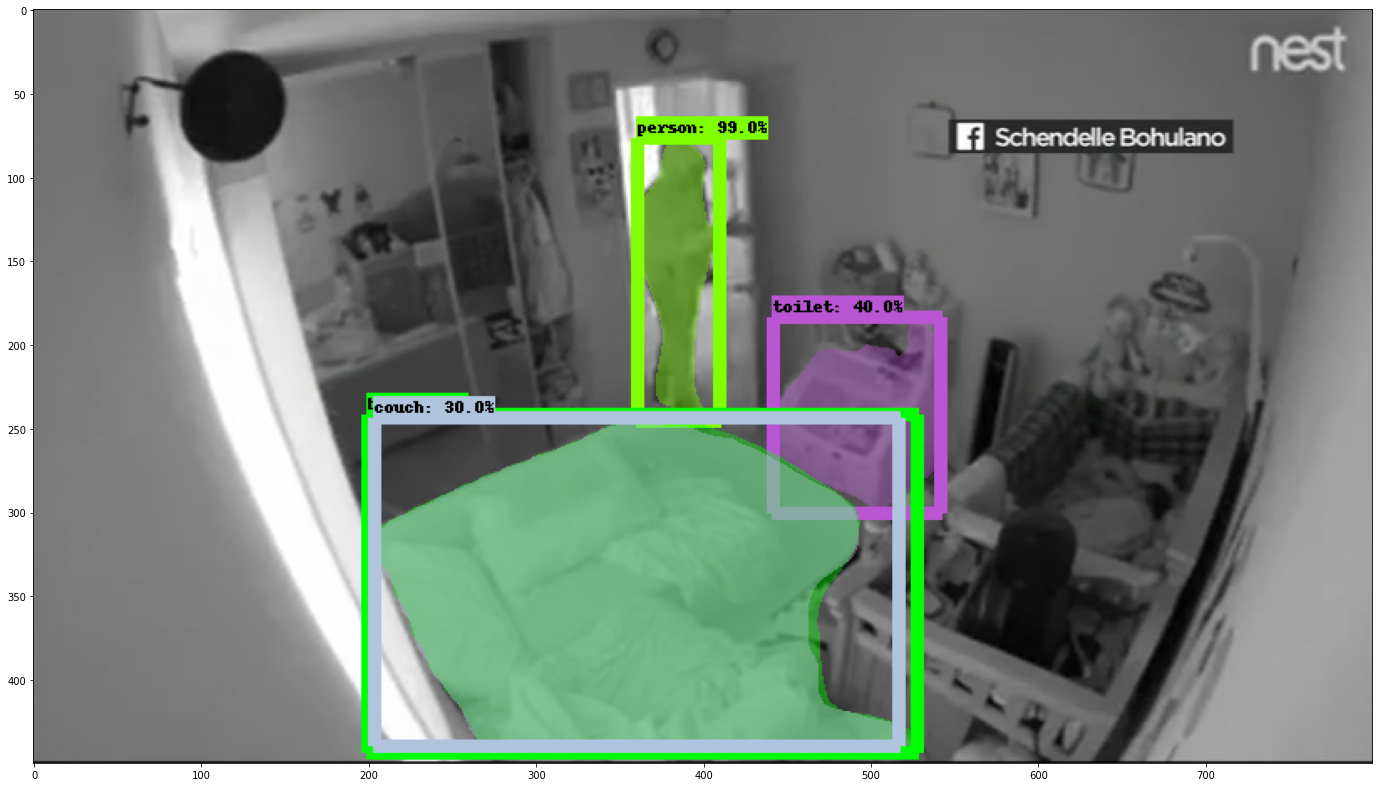

In [41]:
image_np=image_to_array('5.jpg')
display_results(image_np)

### **Observation: successful detection of the man despite the very low quality of the input image and darkness in the room**

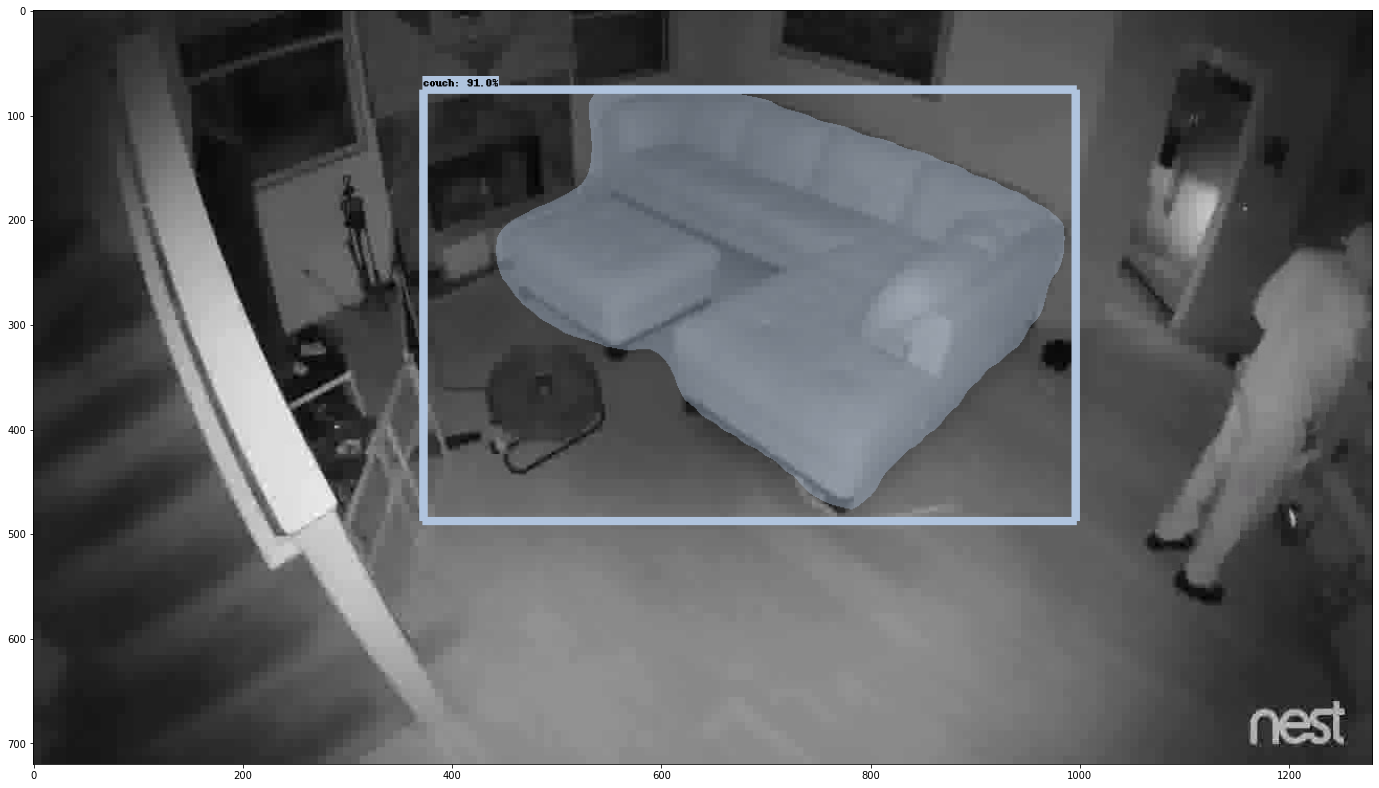

In [42]:
image_np=image_to_array('6.jpg')
display_results(image_np)

### **Observation: complete fail on this image where a man is standing on the right edge of the scene back to the camera and head off the camera's vision area**

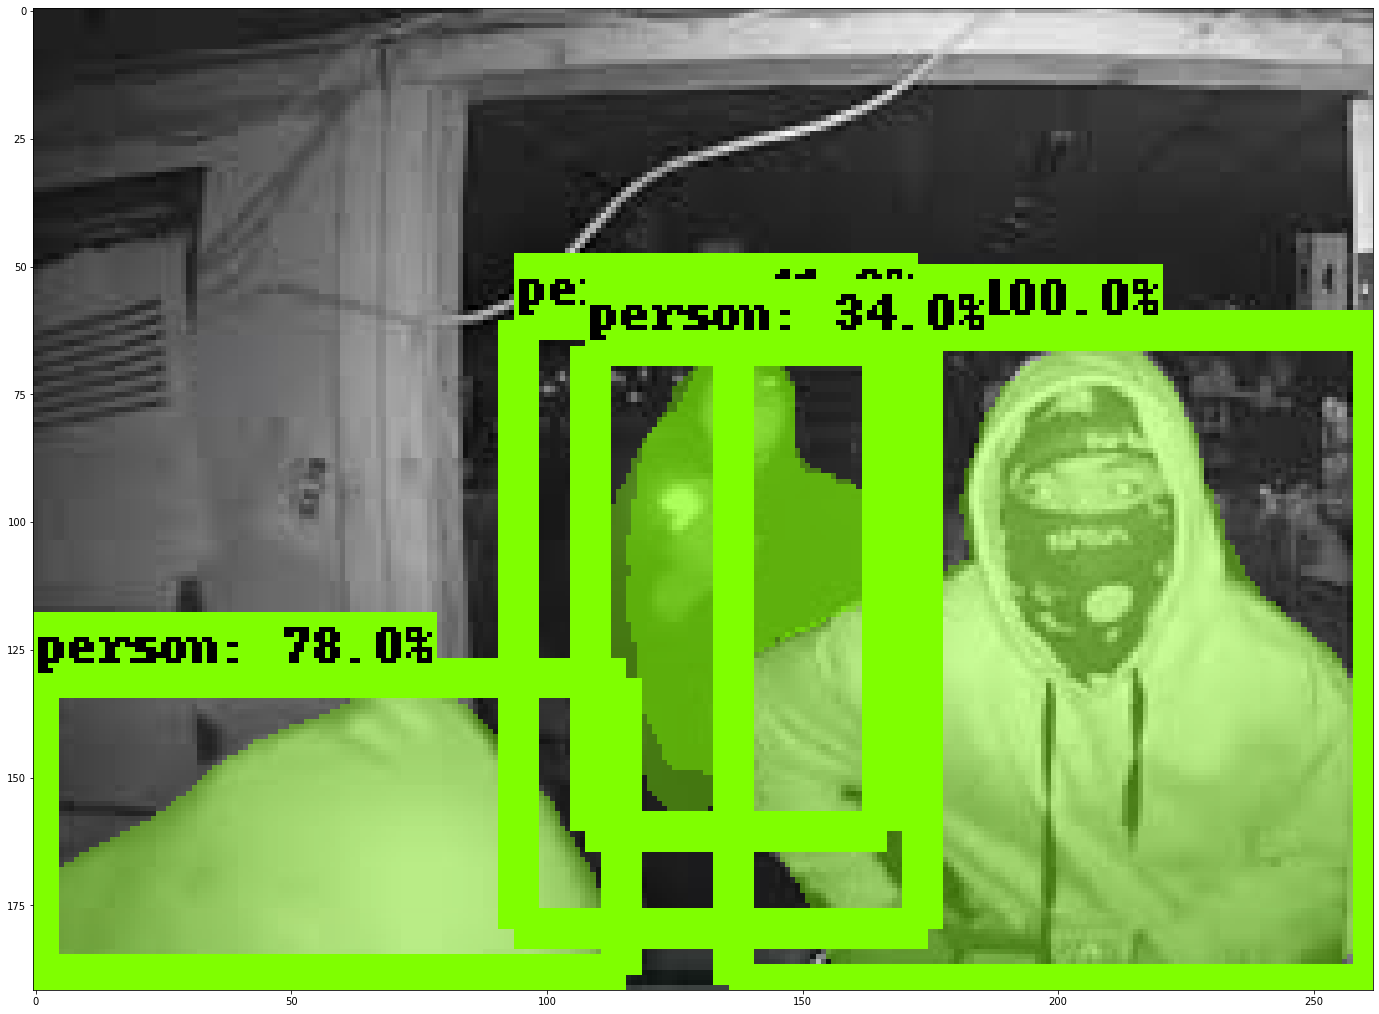

In [44]:
image_np=image_to_array('4.jpg')
display_results(image_np)

### **Observation: test on closer shots, upper body facing camera**

# **Conclusion**
After testing pre_trained Mask-RCNN model on burglary images we can conclude that the model has both strengths and weaknesses when it comes to the specific scenario of a home invasion.


**1.   Strengths**
* strong accuracy in human detection even on night vision cameras

**2. Weaknesses**
* no recognition of weapons 
* no distinction between masked and normal people 



# **Next step**

**1. Test Keypoint version of pre-trained Mask-RCNN on burglary images**

**2. Adapt this TF_Hub object detection code to video input** 

**3. Test keypoint pre_trained Mask-RCNN with video input of home invasions**